In [2]:
pip install mplfinance

     ---------------------------------------- 73.1/73.1 kB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import mplfinance as mpf
import re
import time
import pandas as pd
import json
import requests
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from bs4 import BeautifulSoup
from tqdm import tqdm
from datetime import datetime

In [5]:
#한국투자 API 보안 인증키 발급 
APP_KEY = "PSDbkNNrIX3j60cW2MEFnBGZDZ1BzpgDxvC0"
APP_SECRET = "QfaZRX24K15ojO4yjG5o5dM+SUvJT4PYiK+tKKzgikyhmfrnTXoxOwn9rCf2hzXdtOhh4v3/O4bSFfQgS+u6ojdb6KgWuyub4GRraoWYaJTJyHSRqWUPab2GiCvrI/aIjx5S925MohrETq0k/eopFHgMInG0lmZdAh5TaegaZ1NDpNvPW8Y="
URL_BASE = "https://openapi.koreainvestment.com:9443"
PATH = "oauth2/tokenP"
URL = f"{URL_BASE}/{PATH}"

headers = {"content-type":"application/json"}
body = {"grant_type":"client_credentials",
        "appkey":APP_KEY, 
        "appsecret":APP_SECRET}

res = requests.post(URL, headers=headers, data=json.dumps(body))
ACCESS_TOKEN = res.json()["access_token"]

In [6]:
#일자별 시세 가져오기 (함수)
def get_info_from_kisapi(stock_code,end_date):
    time.sleep(0.1)
    
    st_date = pd.date_range(end = end_date,periods=20)[0]
    st_date = st_date.strftime("%Y%m%d")
    
    URL = 'https://openapi.koreainvestment.com:9443/uapi/domestic-stock/v1/quotations/inquire-daily-itemchartprice'

    headers = {"Content-Type":"application/json", 
            "authorization": f"Bearer {ACCESS_TOKEN}",
            "appKey":APP_KEY,
            "appSecret":APP_SECRET,
            "tr_id":"FHKST03010100"
            }

    params = {
        "FID_COND_MRKT_DIV_CODE":"J",
        "FID_INPUT_ISCD":stock_code,
        "FID_INPUT_DATE_1" : st_date,
        "FID_INPUT_DATE_2" : end_date,
        "FID_PERIOD_DIV_CODE" : "D",
        "FID_ORG_ADJ_PRC" : "1"
    }

    res = requests.get(URL, headers=headers, params=params)   
    res = res.json().get('output2')[0:11]
    res.reverse()
    return res

In [7]:
#종목 일자별 데이터 가져오기 (함수)
def get_info_from_stock(res):
    data = pd.DataFrame()
    for i in res:
        date = i.get('stck_bsop_date')
        date = pd.to_datetime(date)
        temp = pd.DataFrame({
            'Open' :  i.get('stck_oprc'),
            'High' : i.get('stck_hgpr'),
            'Low' : i.get('stck_lwpr'),
            'Close' : i.get('stck_clpr'),
            'Volume'  : i.get('acml_vol')},
            index=[date]
        )
        data = pd.concat([data,temp])
    return data   

In [61]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280 entries, 0 to 1279
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        1280 non-null   object
 1   stock_name  1280 non-null   object
 2   stock_code  1280 non-null   object
 3   class       1280 non-null   object
dtypes: object(4)
memory usage: 40.1+ KB


In [ ]:
#종목별 종목 데이터 뽑기 
def df_stock(stock_code,end_date):

In [3]:
stock = pd.read_csv('./recommend_stock2.csv')

In [66]:
stock

,date,stock_name,stock_code,class
0,2019-10-29,알리코제약,260660,kospi
1,2019-10-29,KPX생명과학,114450,kospi
2,2019-10-29,제일바이오,052670,kospi
3,2019-10-30,광진실업,026910,kospi
4,2019-10-30,아스타,246720,kospi
...,...,...,...,...
1275,2023-02-16,성우하이텍,015750,kospi
1276,2023-02-20,엔켐,348370,kospi
1277,2023-02-20,엔켐,348370,kospi
1278,2023-02-21,대주산업,003310,kospi


In [70]:
stock_code = stock.stock_code[j]
end_date = re.sub("-","",stock.date[j])
res = get_info_from_kisapi(stock_code,end_date)
data = get_info_from_stock(res)
for cn in data.columns:
    data[f'{cn}'] = data[f'{cn}'].apply(lambda x : int(x))
mpf.plot(data, type='candle')

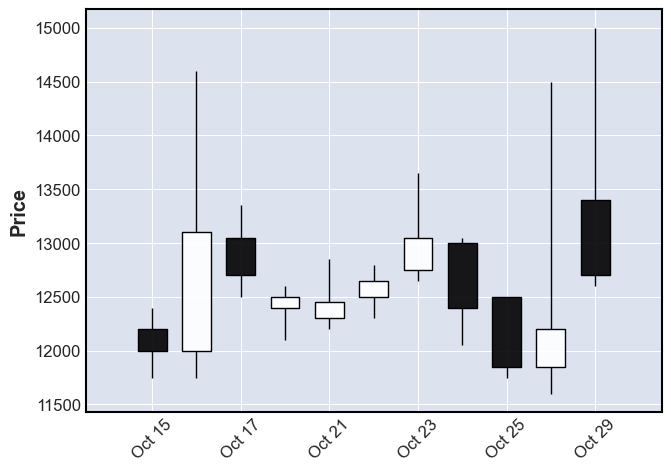

In [57]:
stock[0:15]

,date,stock_name,stock_code,class
0,2019-10-29,알리코제약,260660,kospi
1,2019-10-29,KPX생명과학,114450,kospi
2,2019-10-29,제일바이오,052670,kospi
3,2019-10-30,광진실업,026910,kospi
4,2019-10-30,아스타,246720,kospi
5,2019-10-30,SM,063440,kospi
6,2019-10-31,옴니시스템,057540,kospi
7,2019-10-31,넥스트아이,137940,kospi
8,2019-10-31,알로이스,297570,kospi
9,2019-10-31,룽투코리아,060240,kospi


In [54]:
data

,Open,High,Low,Close,Volume
2019-10-15,12200,12400,11750,12000,297063
2019-10-16,12000,14600,11750,13100,4456192
2019-10-17,13050,13350,12500,12700,510865
2019-10-18,12400,12600,12100,12500,352395
2019-10-21,12300,12850,12200,12450,297777
2019-10-22,12500,12800,12300,12650,326660
2019-10-23,12750,13650,12650,13050,969583
2019-10-24,13000,13050,12050,12400,246112
2019-10-25,12500,12500,11750,11850,122387
2019-10-28,11850,14500,11600,12200,1925148


In [21]:
plt_stock = stock[0:100]
len(plt_stock)

100

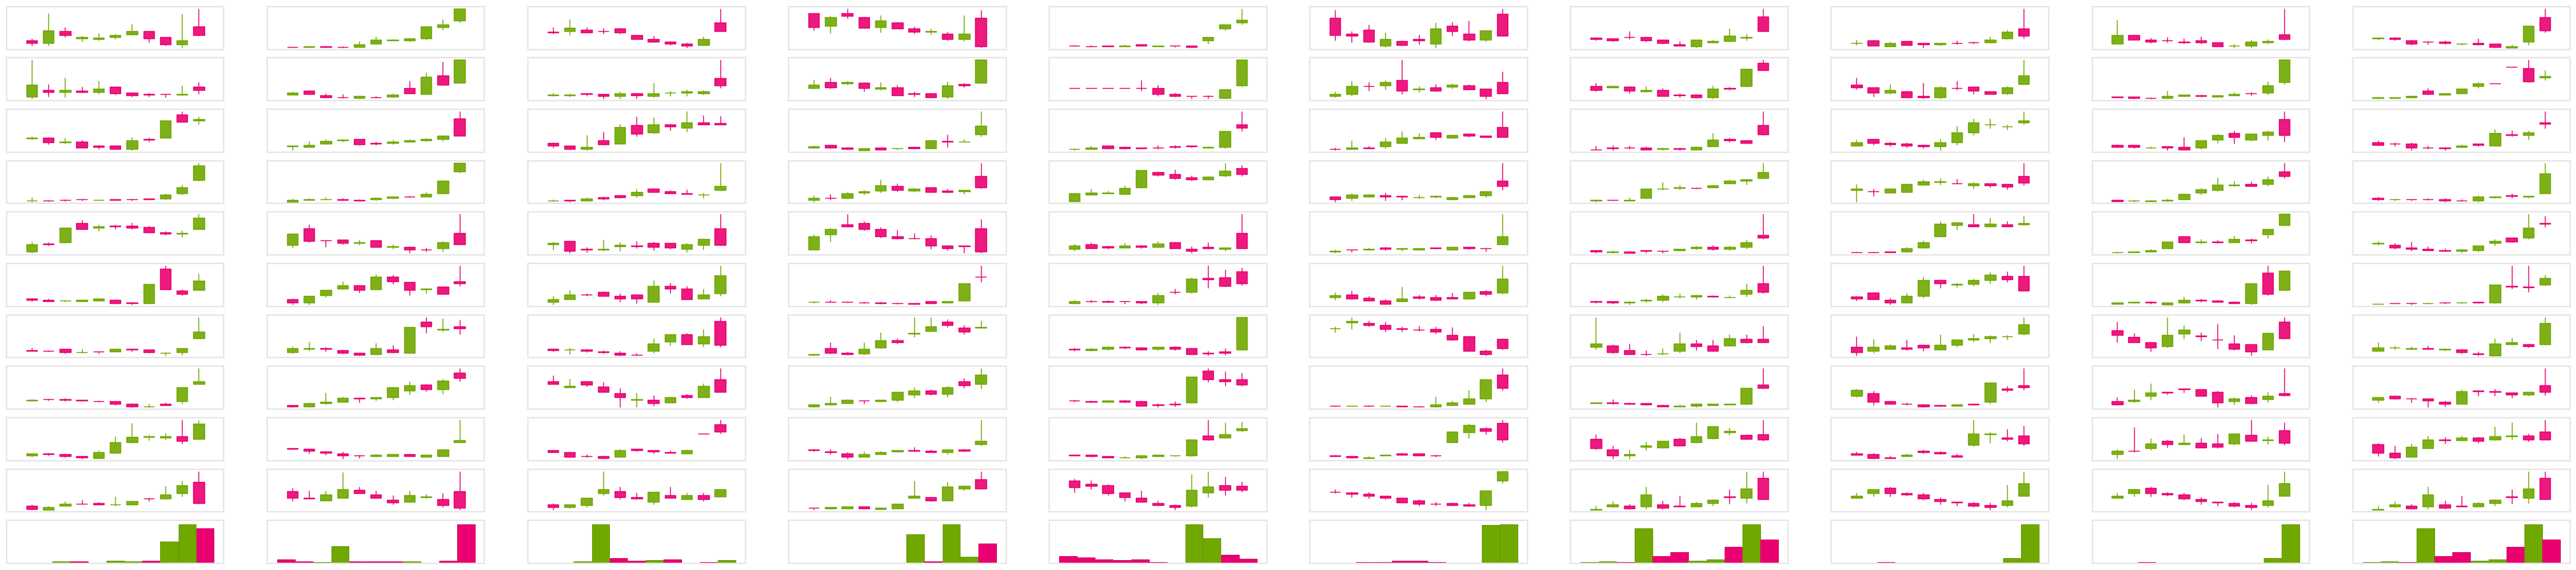

In [22]:
fig = mpf.figure(figsize=(50, 20))
for i in range(len(plt_stock)):
    top_ax = fig.add_subplot(20, 10, i+1, style ='binance')
    top_ax.xaxis.set_visible(False)
    top_ax.yaxis.set_visible(False)

    bottom_ax = fig.add_subplot(20, 10, i+11 , style ='binance')
    bottom_ax.xaxis.set_visible(False)
    bottom_ax.yaxis.set_visible(False)
    
    try :  
        stock_code = stock.stock_code[i]
        end_date = re.sub("-","",stock.date[i])
        res = get_info_from_kisapi(stock_code,end_date)
        data = get_info_from_stock(res)
        for cn in data.columns:
            data[f'{cn}'] = data[f'{cn}'].apply(lambda x : int(x))
        mpf.plot(data, type='candle',volume= bottom_ax ,ax = top_ax)
    
    except TypeError:
        pass

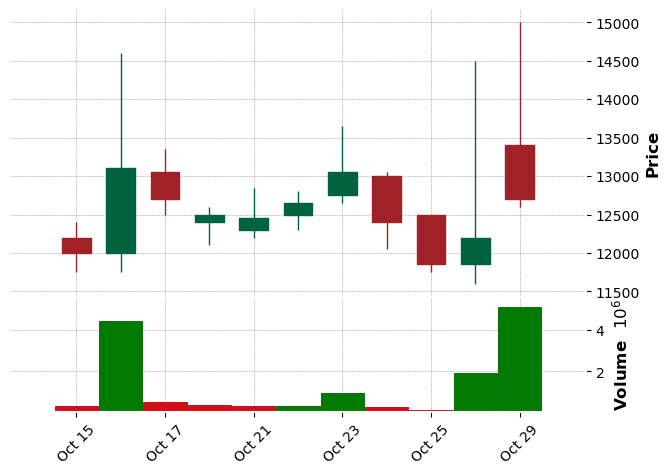

In [53]:
mpf.plot(data,type='candle', style='charles', volume=True)